<a href="https://colab.research.google.com/github/jmorkos/John-Morkos-Project-1/blob/master/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Problem 1: Scatterplot of Left Telencephalon and Right Telencephalon
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
urlfile='https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv'
data=pd.read_csv(urlfile)
data=pd.pivot_table(data, index='id', values='volume', columns='roi')
vol_L=data["Mesencephalon_L"]
vol_R=data["Mesencephalon_R"]
print(vol_L)
print(data.head())
print(data.shape)





id
127    4943.0
142    5279.0
239    4534.0
346    5007.0
422    6396.0
492    5792.0
501    4940.0
505    4484.0
656    6066.0
679    5433.0
742    5073.0
800    3694.0
814    5470.0
815    5267.0
849    5020.0
906    4842.0
913    5680.0
916    5667.0
934    4198.0
959    5230.0
Name: Mesencephalon_L, dtype: float64
roi    ACR_L    ACR_R  ...  subgenual_ACC_L  subgenual_ACC_R
id                     ...                                  
127  12600.0  13280.0  ...           1663.5           1689.5
142  14776.0  14238.0  ...           1602.5           1477.5
239  10318.0  11237.0  ...           1542.0           1525.0
346  13919.0  15528.0  ...           1953.0           1577.0
422  12366.0  11993.0  ...           1298.5           1056.5

[5 rows x 426 columns]
(20, 426)


id
127    4943.0
142    5279.0
239    4534.0
346    5007.0
422    6396.0
492    5792.0
501    4940.0
505    4484.0
656    6066.0
679    5433.0
742    5073.0
800    3694.0
814    5470.0
815    5267.0
849    5020.0
906    4842.0
913    5680.0
916    5667.0
934    4198.0
959    5230.0
Name: Mesencephalon_L, dtype: float64
id
127    5325.0
142    5237.0
239    4536.0
346    4781.0
422    5867.0
492    5943.0
501    5178.0
505    4614.0
656    6040.0
679    5547.0
742    5422.0
800    3592.0
814    5502.0
815    5232.0
849    5082.0
906    4722.0
913    5706.0
916    5693.0
934    4186.0
959    5241.0
Name: Mesencephalon_R, dtype: float64


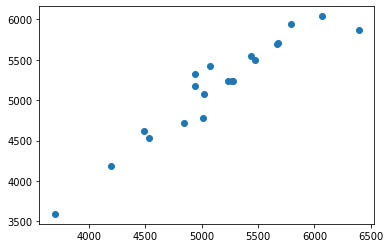

In [3]:

#Scatterplot
print(vol_L)
print(vol_R)
plt.scatter(vol_L, vol_R)

5172.3


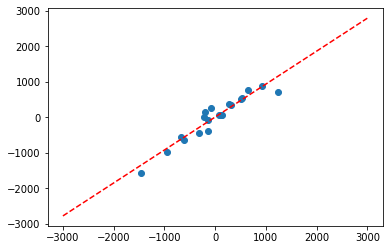

In [4]:
#Problem 2:vol_L as independent variable
print(np.mean(vol_R))
vol_L=vol_L-np.mean(vol_L)
vol_R=vol_R-np.mean(vol_R)

b=sum(vol_L*vol_R)/sum(vol_L**2)
plt.plot(vol_L, vol_R,'o')
t=np.linspace(-3000,3000)
plt.plot(t,t * b, '--r')

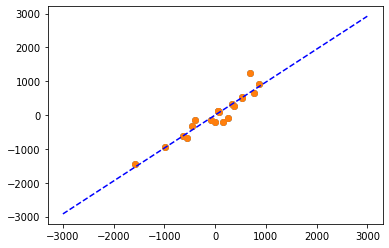

In [5]:
#Problem 2: vol_R as independent variable

plt.plot(vol_R, vol_L,'o')
b1=sum(vol_L*vol_R)/sum(vol_R**2)
plt.plot(vol_R,vol_L, 'o')
t=np.linspace(-3000,3000)
plt.plot(t, t*b1, "--b")

In [162]:
#Problem 3: The slope B  would be altered by a factor of 1/c.

Problem 4:
We take the derivative of the expression $\sum_{i=1}^n({Y_i-\beta_1X_i-\beta_0})^2$ with respect to $B_0$ and $B_1$

# =$\frac{\partial E}{\partial B_0}\sum_{i=1}^n({Y_i-\beta_1X_i-\beta_0})^2$
=$-2(\sum_{i\in(Group 0)}(Y_i-B_0)+\sum_{i\in(Group 1)}(Y_i-B_0-B_1)=0$
$(\sum_{i\in(Group 0)}{Y_i-B_0}+\sum_{i\in(Group 1)}{Y_i-B_0-B_1}=0$

For $\frac{\partial E}{\partial B_1}\sum_{i=1}^n({Y_i-\beta_1X_i-\beta_0})^2$=

=$\sum_{i=1}^{n}(Y_i-\beta_1X_i-\beta_0)X_i$

=$-2(\sum_{i\in(Group 0)}(Y_i-B_0)X_i+\sum_{i\in(Group 1)}(Y_i-\beta_1X_i-\beta_0)X_i$

Since $X_i=0$ in Group Zero

$\sum_{i\in(Group 1)}(Y_i-\beta_1-\beta_0)$=0

Combining the two equations (and let $n_{zero}$ be number of elements in Group 0) :

$\sum_{i\in(Group 0)}(Y_i-B_0)=0$

$\sum_{i\in(Group 0)}{Y_i}-n_{zero}B_0$=0

$B_0=\frac{\sum_{i\in(Group 0)}{Y_i}}{n_{zero}}$
$B_0 = \textrm{mean of elements in Group zero}=\mu_{zero}$

Substituting in our expression for $B_0$

$\sum_{i\in(Group 1)}{Y_i-\mu_{zero}}-B_1=0$

Similar to above:

$B_1=\mu_{one}-\mu_{zero} $

Our final expression could be written as:

$Y=(\mu_{zero}+X(\mu_{one}-\mu_{zero}))$

Plugging in respective values of X for the different groups

When X=0: $Y=\mu_{zero}$

When X=1: $Y =\mu_{one}$

This fits the original claim of the problem












In [14]:
#Problem 5
def LogReg(X,Y):
  elements=len(Y)
  demean_X=(X-np.mean(X)).tolist()
  demean_Y=(Y-np.mean(Y)).tolist()
  pearson1=np.corrcoef(X,Y).tolist()
  print(np.std(X))
  print(pearson1[0][1])
  B_one=pearson1[0][1]*np.std(Y)/np.std(X)
  B_zero=np.mean(Y)-B_one*np.mean(X)
  print(B_one)
  print(B_zero)
  return B_one, B_zero


754.1995027842435
0.9627048718978266
0.8681422329073244
1267.7478646599275


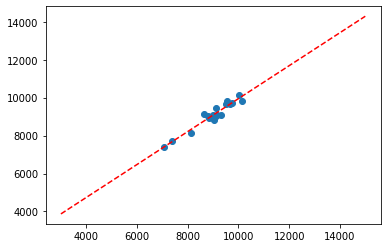

In [17]:
#Problem 6 (Volume L as X)
vol_Di_L=data["Diencephalon_L"]
vol_Di_R=data["Diencephalon_R"]
plt.scatter(vol_Di_L, vol_Di_R)
f=list(LogReg(vol_Di_L, vol_Di_R))
t=np.linspace(3000,15000)

plt.plot(t, t*f[0]+f[1], "--r")



680.1175100671942
0.9627048718978266
1.0675677731655155
-694.1809221478488


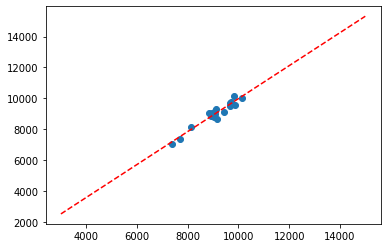

In [19]:
#Problem 6(Volume R as X)
plt.scatter(vol_Di_R, vol_Di_L)
m=list(LogReg(vol_Di_R, vol_Di_L))

t=np.linspace(3000,15000)
plt.plot(t, m[0]*t+m[1], '--r' )

Take Y and X and divide by respective SD's
$Y_{norm}=[Y]/SD_Y$
$X_{norm}=[X]/SD_X$

(Let's regress X to Y; the same applies vice versa)
Covariance of $(X_{norm}, Y_{norm})$= $\frac{COV(X,Y)}{SD_Y*SD_X}$

$SD_{X_{norm}}=\frac{1}{SD_X{}}{SD_X}=1$

Likewise for $SD_{Y_{norm}}=1$

Therefore:

$B_1=Cor(X_{norm},Y_{norm})\frac{SD_{Y_{norm}}}{SD_{X_{norm}}}$

$=\frac{Cov(X_{norm},Y_{norm})}{{SD_{X_{norm}}{SD_{Y_{norm}}}}}{\frac{SD_{Y_{norm}}}{SD_{X_{norm}}}}$

Plugging in values from above:

$=\frac{COV(X,Y)}{{{SD_{Y}}{SD_{X}}}}$
= correlation([X],[Y])